<div style="text-align: center; font-size: 30pt; font-weight: bold; margin: 1em 0em 1em 0em">IFT 6285 - TD 1</div>

$\textbf{Auteur}$ : Adel Nabli


$\textbf{ID}$: 20121744

In [1]:
import numpy as np
import pandas as pd
import nltk ,re, time

from nltk.util import ngrams
from collections import Counter
from tqdm import tqdm

### Import des données test complétées

In [2]:
Data_metric_en = open('unk-europarl-v7.fi-en-u30.fi', encoding = 'latin1')

### Tag to POS

In [3]:
dict_tag_to_pos = {'CC': 'CONJ', 
                   'CD': 'CARD',
                   'DT': 'DET',
                   'EX': 'ADV',
                   'FW': 'X',
                   'IN': 'ADP',
                   'IN/that': 'ADP',
                   'JJ': 'ADJ',
                   'JJR': 'ADJ',
                   'JJS': 'ADJ',
                   'LS': 'ADJ',
                   'MD': 'VERB',
                   'NN': 'NOUN',
                   'NNS': 'NOUN',
                   'NP': 'NOUN',
                   'NPS': 'NOUN',
                   'PDT': 'ADJ',
                   'POS': 'PART',
                   'PP': 'PRON',
                   'PP$': 'ADJ',
                   'RB': 'ADV',
                   'RBR': 'ADV',
                   'RBS': 'ADV',
                   'RP': 'PART',
                   'SENT': 'SENT',
                   'SYM': 'SYM',
                   'TO': 'PART',
                   'UH': 'INTJ',
                   'VB': 'VERB',
                   'VBD': 'VERB',
                   'VBG': 'VERB',
                   'VBN': 'VERB',
                   'VBZ': 'VERB',
                   'VBP': 'VERB',
                   'VD':'VERB',
                   'VDD': 'VERB',
                   'VDG': 'VERB',
                   'VDN': 'VERB',
                   'VDZ': 'VERB',
                   'VDP': 'VERB',
                   'VH': 'VERB',
                   'VHD': 'VERB',
                   'VHG': 'VERB',
                   'VHN': 'VERB',
                   'VHZ': 'VERB',
                   'VHP': 'VERB',
                   'VV': 'VERB',
                   'VVD': 'VERB',
                   'VVG': 'VERB',
                   'VVN': 'VERB',
                   'VVP': 'VERB',
                   'VVZ': 'VERB',
                   'WDT': 'ADJ',
                   'WP': 'NOUN',
                   'WP$': 'ADJ',
                   'WRB': 'ADV',
                   ':': 'PUNCT',
                   ',': 'PUNCT',
                   '"': 'PUNCT',
                   '$': 'SYM'}

### Tokenisation du train set

In [9]:
Data1 = pd.read_csv('train_fi_pos_part1', sep='\t', encoding='latin1', names=['Token', 'POS', 'Lemma'])
Data2 = pd.read_csv('train_fi_pos_part2', sep='\t', encoding='latin1', names=['Token', 'POS', 'Lemma'])
Data3 = pd.read_csv('train_fi_pos_part3', sep='\t', encoding='latin1', names=['Token', 'POS', 'Lemma'])
Data4 = pd.read_csv('train_fi_pos_part4', sep='\t', encoding='latin1', names=['Token', 'POS', 'Lemma'])

df1 = pd.DataFrame(data=Data1)
df2 = pd.DataFrame(data=Data2)
df3 = pd.DataFrame(data=Data3)
df4 = pd.DataFrame(data=Data4)

train_pos = list(df1['POS']) + list(df2['POS']) + list(df3['POS']) + list(df4['POS'])

# We translate the tags to pos

for k in range(len(train_pos)):
    
    if train_pos[k] in dict_tag_to_pos:
        
        train_pos[k] = dict_tag_to_pos[train_pos[k]]

train_tokens = list(df1['Token']) + list(df2['Token']) + list(df3['Token']) + list(df4['Token'])
train_lemmas = list(df1['Lemma']) + list(df2['Lemma']) + list(df3['Lemma']) + list(df4['Lemma'])

Data_train_en_sent = []
Data_train_en_reversed = []
Data_train_en_pos = []
Data_train_en_pos_reversed = []
Data_train_en_lemma = []
Data_train_en_lemma_reversed = []

line_token = ['<s>']
line_pos = ['<s>']
line_lemma = ['<s>']

dict_token_pos = dict()
dict_token_lemma = dict()

for k in tqdm(range(len(train_pos))):
    
    if train_tokens[k] in dict_token_pos:
        
        dict_token_pos[train_tokens[k]].append(train_pos[k])
        dict_token_lemma[train_tokens[k]].append(train_lemmas[k])
    
    else:
        
        dict_token_pos[train_tokens[k]] = [train_pos[k]]
        dict_token_lemma[train_tokens[k]] = [train_lemmas[k]]
    
    if train_pos[k] == 'SENT':
        
        line_pos.append('SENT')
        line_pos.append('<s>')
        line_token.append('.')
        line_token.append('<s>')
        line_lemma.append('.')
        line_lemma.append('<s>')
        
        Data_train_en_sent.append(line_token)
        Data_train_en_reversed.append(line_token[::-1])
        Data_train_en_pos.append(line_pos)
        Data_train_en_pos_reversed.append(line_pos[::-1])
        Data_train_en_lemma.append(line_lemma)
        Data_train_en_lemma_reversed.append(line_lemma[::-1])
        
        line_token = ['<s>']
        line_pos = ['<s>']
        line_lemma = ['<s>']
    
    else:
        
        line_token.append(train_tokens[k])
        line_pos.append(train_pos[k])
        line_lemma.append(train_lemmas[k])

for tokens in dict_token_pos.keys():
    
    dict_token_pos[tokens] = Counter(dict_token_pos[tokens])
    dict_token_lemma[tokens] = Counter(dict_token_lemma[tokens])

100%|██████████| 23511687/23511687 [00:52<00:00, 445599.41it/s]


### Tokenisation du test set

In [11]:
Data_test = pd.read_csv('test_30_fi', sep='\t', encoding='latin1', names=['Token', 'POS', 'Lemma'])

df_test = pd.DataFrame(data=Data_test)

test_pos = list(df_test['POS'])

# We translate the tags to pos

for k in range(len(test_pos)):
    
    if test_pos[k] in dict_tag_to_pos:
        
        test_pos[k] = dict_tag_to_pos[test_pos[k]]

test_tokens = list(df_test['Token'])
test_lemmas = list(df_test['Lemma'])

Data_test_en_sent = []
Data_test_en_reversed = []
Data_test_en_pos = []
Data_test_en_pos_reversed = []
Data_test_en_lemma = []
Data_test_en_lemma_reversed = []

line_token = ['<s>', '<s>', '<s>']
line_pos = ['<s>', '<s>', '<s>']
line_lemma = ['<s>', '<s>', '<s>']

for k in tqdm(range(len(test_pos))):
    
    if test_pos[k] == 'SENT':
        
        line_pos += ['SENT', '<s>', '<s>', '<s>']
        line_token += ['.', '<s>', '<s>', '<s>']
        line_lemma += ['.', '<s>', '<s>', '<s>']
        
        Data_test_en_sent.append(line_token)
        Data_test_en_reversed.append(line_token[::-1])
        Data_test_en_pos.append(line_pos)
        Data_test_en_pos_reversed.append(line_pos[::-1])
        Data_test_en_lemma.append(line_lemma)
        Data_test_en_lemma_reversed.append(line_lemma[::-1])
        
        line_token = ['<s>', '<s>', '<s>']
        line_pos = ['<s>', '<s>', '<s>']
        line_lemma = ['<s>', '<s>', '<s>']
    
    elif test_tokens[k] == '<unk/>':
        
        line_token.append('<unk/>')
        line_pos.append('<unk/>')
        line_lemma.append('<unk/>')
    
    else:
        
        line_token.append(test_tokens[k])
        line_pos.append(test_pos[k])
        line_lemma.append(test_lemmas[k])

100%|██████████| 22640/22640 [00:02<00:00, 9807.10it/s] 


## Définition de la méthode

In [13]:
class Kneser_Ney():
    
    def __init__(self, discount):
        
        self.d = discount
        
        self.counter_trigram = Counter()
        self.counter_bigram = Counter()
        self.counter_tokens = Counter()
        
        self.Nwwo = dict()
        self.Nwo = dict()
        self.Now = dict()
        
        self.proba_already_computed = dict()
        
    def create_counters(self, Data_train):
        
        """We create the different necessary counters from the training set"""
        
        print('Computing the sets of counts...')
        
        t = time.time()
        
        train_3grams = ( ngram for sent in Data_train for ngram in ngrams(sent, 3, pad_left=True, pad_right=True, left_pad_symbol = '<s>', right_pad_symbol='<s>'))
        train_2grams = ( ngram for sent in Data_train for ngram in ngrams(sent, 2, pad_left=True, pad_right=True, left_pad_symbol = '<s>', right_pad_symbol='<s>'))
        train_1grams = (tokens for sent in Data_train for tokens in sent)

        self.counter_trigram = Counter(train_3grams)
        self.counter_bigram = Counter(train_2grams)
        self.counter_tokens = Counter(train_1grams)
        
        self.compute_N_wwo()
        self.compute_N_wo()
        self.compute_N_ow()
        
        print("Counters created, time taken: ", time.time() - t, " seconds")

    ### We define the functions that compute the different trees ###
    
    def compute_N_wwo(self):

        for trigrams, counts in self.counter_trigram.items():
            
            if trigrams[0] not in self.Nwwo:
                
                self.Nwwo[trigrams[0]] = dict()
                
            if trigrams[1] not in self.Nwwo[trigrams[0]]:
                
                self.Nwwo[trigrams[0]][trigrams[1]] = dict()
                
            if trigrams[2] not in self.Nwwo[trigrams[0]][trigrams[1]]:
                
                self.Nwwo[trigrams[0]][trigrams[1]][trigrams[2]] = counts
        
    
    def compute_N_wo(self):
        
        for bigrams, counts in self.counter_bigram.items():
            
            if bigrams[0] not in self.Nwo:
                
                self.Nwo[bigrams[0]] = dict()
                
            if bigrams[1] not in self.Nwo[bigrams[0]]:
                
                self.Nwo[bigrams[0]][bigrams[1]] = counts
                
    
    def compute_N_ow(self):
        
        for bigrams, counts in self.counter_bigram.items():
            
            if bigrams[1] not in self.Now:
                
                self.Now[bigrams[1]] = dict()
                
            if bigrams[0] not in self.Now[bigrams[1]]:
                
                self.Now[bigrams[1]][bigrams[0]] = counts
    
    
    def proba_word(self, trigram):
        
        """we compute the probability P(word | bigram)"""
    
        proba = 0
    
        # We extract the bigram, the unigram before the trigram and the last word of the trigram
    
        ww = (trigram[0], trigram[1])
        w = trigram[1]
        word = trigram[2]
    
        # We compute the different parts needed and we add them to the proba
    
        count_ww = self.counter_bigram[ww]
        count_w = self.counter_tokens[w]
        
        # if we have seen the last word of the bigram in the training set
        
        if count_w > 0 :
            
            gamma_1 = self.d/count_w * len(self.Nwo[w])
            C = len(self.Now[word]) / len(self.counter_bigram)
            proba += gamma_1 * C
    
        # if we have seen the bigram in the training set, we compute the parts needed and add them to the proba
    
        if count_ww > 0:
        
            A = max(0, self.counter_trigram[trigram]-self.d)
            B = max(0, self.counter_bigram[(w, word)]-self.d)
        
            gamma_2 = self.d/count_ww * len(self.Nwwo[trigram[0]][trigram[1]])
        
            proba += A/count_ww
            proba += gamma_2 * (B/count_w)
    
        return(proba)


    def predict_next_word(self, nb_words_to_show, bigram):
        
        """predict the nb_words_to_show most probable tokens that come after the bigram encountered"""
    
        # if we already computed the probability for this bigram
    
        if bigram in self.proba_already_computed:
        
            return(self.proba_already_computed[bigram])
    
        dict_of_words = dict()
    
        for tokens, _ in self.counter_tokens.items():
            
            if tokens == '<s>':
                continue
        
            trigram = (bigram[0], bigram[1], tokens)
            proba_token = self.proba_word(trigram)
            dict_of_words[tokens] = proba_token
        
            if len(dict_of_words) == nb_words_to_show +1:
                
                least_probable_token = sorted(dict_of_words, key=dict_of_words.__getitem__)[0]
                del dict_of_words[least_probable_token]
    
        self.proba_already_computed[bigram] = dict_of_words
    
        return(dict_of_words)

  
    def predict_all_words(self, Data, nb_words_to_show, use_pos=False, reverse=False):
            
        """
        For every word missing in the Data set, we compute the nb_words_to_show most probable words.
        Returns the list of the words missing and the list of the dictionnaries containing the most probable words."""
        
        words_predicted = []
        cpt = 0
            
        for line in tqdm(Data):
            
            sentence = line.copy()
            
            cpt += 1
            if cpt > 100:
                break
            
            words_predicted_sent = []
            
            for k in range(len(line)):
                
                if line[k] == '<unk/>':
                    
                    # We predict the word missing using the Knesser Ney method
                    
                    predicted_dict = self.predict_next_word(nb_words_to_show, (sentence[k-2], sentence[k-1]))
                
                    # if asked to, we compute also the POS of the words predicted
                
                    if use_pos:
                    
                        modified_dict = dict()
                        
                        for words, proba in predicted_dict.items():
                            
                            words_pos = sorted(dict_token_pos[words], key=dict_token_pos[words].__getitem__)[-1]
                            modified_dict[(words, words_pos)] = proba
                            
                        words_predicted_sent.append(modified_dict)
                
                    else:
                    
                        words_predicted_sent.append(predicted_dict)
                    
                    # we reconstruct the sentence for the prediction of the next word missing in the line
                    
                    predicted_word = sorted(predicted_dict, key=predicted_dict.__getitem__)[-1]
                    sentence[k] = predicted_word
            
            if reverse:
                
                words_predicted_sent = words_predicted_sent[::-1]
            
            for predictions in words_predicted_sent:
                
                words_predicted.append(predictions)
            
        return(words_predicted)
        

In [14]:
class MLE(object):
    
    def __init__(self):
        
        self.counter_trigram = Counter()
        self.counter_quadrigram = Counter()
        self.counter_tokens = Counter()
        
        self.N_trigram = 1
        self.N_quadrigram = 1
        
        self.proba_bigram_already_computed = dict()
        self.proba_trigram_already_computed = dict()
        
    def create_counters(self, Data_train):
        
        train_4grams = ( ngram for sent in Data_train for ngram in ngrams(sent, 4, pad_left=True, pad_right=True, left_pad_symbol = '<s>', right_pad_symbol='<s>'))
        train_3grams = ( ngram for sent in Data_train for ngram in ngrams(sent, 3, pad_left=True, pad_right=True, left_pad_symbol = '<s>', right_pad_symbol='<s>'))
        train_1grams = (tokens for sent in Data_train for tokens in sent)
        
        self.counter_trigram = Counter(train_3grams)
        self.counter_quadrigram = Counter(train_4grams)
        self.counter_tokens = Counter(train_1grams)
        
        self.N_trigram = sum([nb for nb in self.counter_trigram.values()])
        self.N_quadrigrams = sum([nb for nb in self.counter_quadrigram.values()])
        
    
    def proba_word(self, ngram, is_trigram=False, is_quadrigram=False):
        
        if is_trigram:
            
            return(self.counter_trigram[ngram] / self.N_trigram )
        
        if is_quadrigram:
            
            return(self.counter_quadrigram[ngram] / self.N_quadrigram)
    
    def predict_next_word(self, nb_words_to_show, ngram, is_trigram=False):
        
        if not is_trigram:
            
            if ngram in self.proba_bigram_already_computed:
                return(self.proba_bigram_already_computed[ngram])
            
            dict_of_words = dict()
            
            for tokens, _ in self.counter_tokens.items():
                
                if tokens == '<s>':
                    continue
                
                trigram = (ngram[0], ngram[1], tokens)
                proba_token = self.proba_word(trigram, is_trigram=True)
                dict_of_words[tokens] = proba_token
        
                if len(dict_of_words) == nb_words_to_show +1:
                
                    least_probable_token = sorted(dict_of_words, key=dict_of_words.__getitem__)[0]
                    del dict_of_words[least_probable_token]
    
            self.proba_bigram_already_computed[ngram] = dict_of_words
        
        else:
            
            if ngram in self.proba_trigram_already_computed:
                return(self.proba_trigram_already_computed[ngram])
            
            dict_of_words = dict()
            
            for tokens, _ in self.counter_tokens.items():
                
                if tokens == '<s>':
                    continue
                
                quadrigram = (ngram[0], ngram[1], ngram[2], tokens)
                proba_token = self.proba_word(quadrigram, is_quadrigram=True)
                dict_of_words[tokens] = proba_token
        
                if len(dict_of_words) == nb_words_to_show +1:
                
                    least_probable_token = sorted(dict_of_words, key=dict_of_words.__getitem__)[0]
                    del dict_of_words[least_probable_token]
    
            self.proba_trigram_already_computed[ngram] = dict_of_words
    
        return(dict_of_words)
    
    def predict_all_words(self, Data, nb_words_to_show, use_pos=False, use_4gram=False, reverse=False):
            
        """
        For every word missing in the Data set, we compute the nb_words_to_show most probable words.
        Returns the list of the words missing and the list of the dictionnaries containing the most probable words."""

        words_predicted = []
        
        cpt = 0
            
        for line in tqdm(Data):
            
            sentence = line.copy()
            
            cpt += 1
            if cpt > 100:
                break
            
            # We build the sentence with which we will work and the true words we have to predict
            
            if use_4gram:
                
                sentence = ['<s>'] + sentence + ['<s>']

            words_predicted_sent = []
            
            for k in range(len(line)):
                
                if line[k] == '<unk/>':
                    
                    # We predict the word missing using the MLE method
                    
                    if use_4gram:
                    
                        ngram = (sentence[k-3], sentence[k-2], sentence[k-1])
                        
                    else:
                        
                        ngram = (sentence[k-2], sentence[k-1])
                    
                    predicted_dict = self.predict_next_word(nb_words_to_show, ngram, is_trigram=use_4gram)
                
                    # if asked to, we compute also the POS of the words predicted
                
                    if use_pos:
                    
                        modified_dict = dict()
                        
                        for words, proba in predicted_dict.items():
                            
                            words_pos = sorted(dict_token_pos[words], key=dict_token_pos[words].__getitem__)[-1]
                            modified_dict[(words, words_pos)] = proba
                            
                        words_predicted_sent.append(modified_dict)
                
                    else:
                    
                        words_predicted_sent.append(predicted_dict)
                
                    # we reconstruct the sentence for the prediction of the next word missing in the line
               
                    predicted_word = sorted(predicted_dict, key=predicted_dict.__getitem__)[-1]
                    sentence[k] = predicted_word 
                
            if reverse:
                
                words_predicted_sent = words_predicted_sent[::-1]
            
            for predictions in words_predicted_sent:
                
                words_predicted.append(predictions)
            

        return(words_predicted)

In [15]:
def merge_predictions(prediction_normal, prediction_reversed, nb_words_to_predict, use_pos=False):
    
    """
    We use this function after having used predict_all_words several times,
    for example in the case we have used it with a reversed data set or to predict the pos"""
    
    prediction_return = []
    prediction_1 = prediction_normal.copy()
    prediction_2 = prediction_reversed.copy()
    
    for k in range(len(prediction_2)):
        
        if use_pos:
            
            for (word, pos) in prediction_1[k]:
            
                proba = 0
            
                if (word, pos) in prediction_2[k]:
                
                    proba = prediction_2[k][(word, pos)]
            
                prediction_1[k][(word, pos)] += proba
        
        else:
            
            for word in prediction_1[k]:
            
                proba = 0
            
                if word in prediction_2[k]:
                
                    proba = prediction_2[k][word]
            
                prediction_1[k][word] += proba
        
        prediction_2[k].update(prediction_1[k])
        sorted_words = sorted(prediction_2[k], key=prediction_2[k].__getitem__)
        
        for i in range(len(sorted_words)-nb_words_to_predict):
            
            del prediction_2[k][sorted_words[i]]

        merged_prediction = dict(prediction_2[k])
        prediction_return.append(merged_prediction)
            
    return(prediction_return)

In [16]:
def merge_prediction_pos(predictions_words, predictions_pos, nb_words_to_show):
    
    """create the new prediction from the word alone prediction and the pos prediction"""
    
    predictions_return = []
    cpt_pos = -1
    
    for k in range(len(predictions_words)):
        
        # if we have predicted the POS for this word
        
        cpt_pos += 1
        
        keys_to_del = []
        
        for (word, pos) in predictions_words[k]:
            
            if pos in predictions_pos[cpt_pos]:
                
                proba = predictions_pos[cpt_pos][pos]
                predictions_words[k][(word, pos)] *= proba
                
            else :
                    
                keys_to_del.append((word, pos))
        
        # if we don't delete all predictions
        
        if len(predictions_words[k]) != len(keys_to_del):
            
            for keys in keys_to_del:
                
                del predictions_words[k][keys]
        
        sorted_words = sorted(predictions_words[k], key=predictions_words[k].__getitem__)
        
        if len(sorted_words) > nb_words_to_show -1:
            
            for i in range(len(sorted_words)-nb_words_to_show):
                
                del predictions_words[k][sorted_words[i]]

        merged_prediction = dict(predictions_words[k])
        predictions_return.append(merged_prediction)
            
    return(predictions_return)

In [17]:
def metric(prediction, true_words, use_pos=False):
    
    well_done = 0
    list_proba = []
    
    for k in range(len(prediction)):
        
        if use_pos:
            
            if true_words[k] in [words for (words,pos) in prediction[k].keys()]:
            
                well_done +=1
                
                for (words, pos) in prediction[k].keys():
                    
                    if words == true_words[k]:
                        
                        list_proba.append(prediction[k][(words, pos)])
        else:
            
            if true_words[k] in prediction[k]:
            
                well_done +=1
                
                list_proba.append(prediction[k][true_words[k]])
    
    return(well_done / len(prediction), list_proba)

In [18]:
def get_real_answers(Data_metric):
    
    answers = []
    
    for line in Data_metric:
        
        true_words = re.findall('<unk w=\"([^ ]*)\"/>', line)
        
        for words in true_words:
            
            answers.append(words)
    
    return(answers)

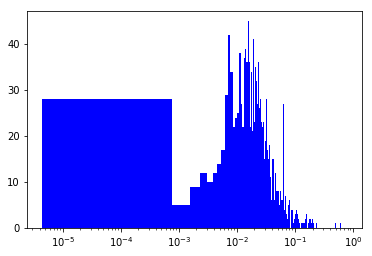

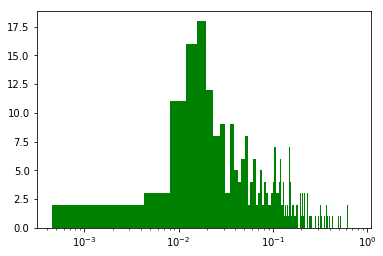

In [36]:
import matplotlib.pyplot as plt

x =[]

for dict_words in prediction_using_pos:
    
    for proba in dict_words.values():
        
        x.append(proba)

p, bins, patches = plt.hist(x, 1000, color='b')
plt.xscale('log')
plt.show()

p, bins, patches = plt.hist(list_proba, 200, color='g')
plt.xscale('log')
plt.show()

In [83]:
def gini(y):

    """Compute the gini coefficient of the vector y"""

    bins = np.linspace(0., 100., 11)
    total = float(np.sum(y))
    yvals = []

    for b in bins:

        bin_vals = y[y <= np.percentile(y, b)]
        bin_fraction = (np.sum(bin_vals) / total) * 100.0
        yvals.append(bin_fraction)

    # perfect equality area
    pe_area = np.trapz(bins, x=bins)
    # lorenz area
    lorenz_area = np.trapz(yvals, x=bins)
    gini_val = (pe_area-lorenz_area )/ float(pe_area)

    return bins, yvals, gini_val

In [87]:
def plot_gini(bins, result, gini_val):

    """Plot the gini curve"""

    plt.figure(figsize=(6,4))
    plt.plot(bins, result, label="observé")
    plt.plot(bins, bins, '--', label="ideal")
    plt.xlabel("effectif relatif cumulé des vocables classés par ordre croissant de fréquence")
    plt.ylabel("surface relative cumulée du texte couverte \n par les vocables de la classe correspondante")
    plt.title("GINI: %.4f" % (gini_val))
    plt.legend()

In [65]:
words = list(tokens for sent in Data_train_en_sent for tokens in sent)
counter_token = Counter(words)
y_counts = []
    
for word in words:
    y_counts.append(counter_token[word])
    
counter_counts_different = Counter(y_counts)
y =[]
for counts in counter_counts_different:
    y.append(counter_counts_different[counts])
y = np.array(y)

In [76]:
R = len(counter_token) / len(words)
R

0.0030271361486837816

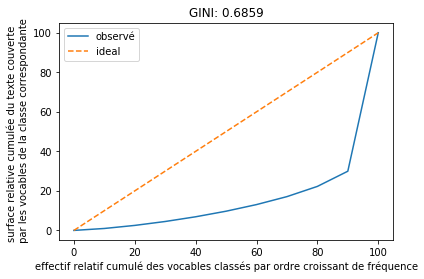

In [88]:
bins, yvals, gini_val = gini(y)
plot_gini(bins, yvals, gini_val)